In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, analysis as ana, tools_qrec, curvedsky as cs, pickle, local, tools_cmb, tools_cib, warnings
from matplotlib.pyplot import *
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

In [2]:
#wind = 'G40'
wind = 'G60'
#aobj = local.init_analysis(snmax=200,freq='nilc',dtype='full',wind='L'+wind,fltr='cinv')
aobj = local.init_analysis(snmax=200,freq='smica',dtype='full',wind='L'+wind,fltr='cinv')
qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)
#qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=1900)
iobj = tools_cib.init_cib(wind=wind)
xobj = tools_qrec.cross(qobj['ilens'],iobj,aobj.ids)

In [3]:
quad = ['TB','EB']
qall = ['TB','EB','MV']

#### ilens x lens

In [4]:
mb = bn.multipole_binning(20,lmin=2,lmax=2000)
#tcb = tools_qrec.n0_template(aobj,iobj,mb)
tcb = None
mcb, vcb, scb, ocb = tools_qrec.binned_spec(mb,aobj,qobj,xobj,3,tcb=tcb,quad=quad)

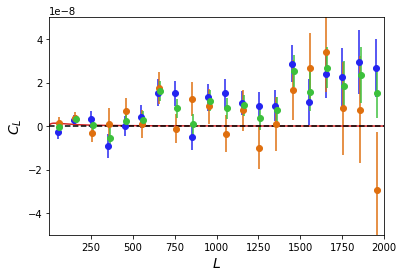

In [5]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-5e-8,ymax=5e-8)
for i, q in enumerate(qall):
    errorbar(mb.bc+i*5,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
plot(aobj.l,aobj.ckk*np.pi/180.*.35)
axhline(0,color='k',ls='--')

In [6]:
mb = bn.multipole_binning(8,lmin=8,lmax=400)
mkk = bn.binning(aobj.ckk*np.pi/180,mb)
tcb = tools_qrec.n0_template(aobj,iobj,mb)
mcb, vcb, scb, ocb = tools_qrec.binned_spec(mb,aobj,qobj,xobj,3,tcb=tcb,quad=quad)

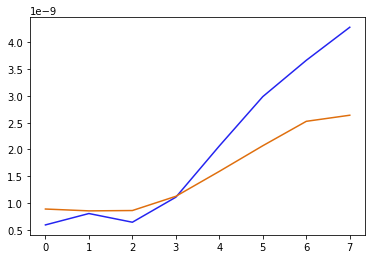

In [7]:
for i, q in enumerate(quad):
    plot(tcb[q])

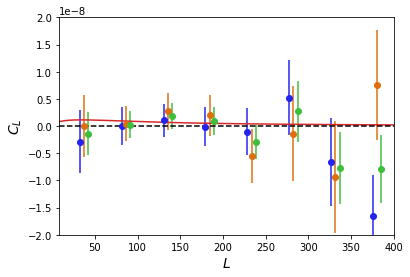

In [8]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-2e-8,ymax=2e-8)
for i, q in enumerate(qall):
    errorbar(mb.bc+i*5,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
plot(aobj.l,aobj.ckk*np.pi/180.*.3)
axhline(0,color='k',ls='--')

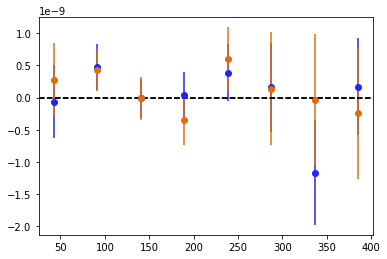

In [9]:
for q in quad:
    errorbar(mb.bc+i*5,mcb[q],yerr=vcb[q]/10,fmt='o')
    axhline(0,color='k',ls='--')

In [10]:
st_kap = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=mkk,diag=True,disp=True) for q in qall}
st_kap = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=mkk,diag=False,disp=True) for q in qall}

obs A -0.154 mean(A) 0.062 sigma(A) 0.753 S/N 1.329 A>oA 0.8200000000000001
obs A 0.272 mean(A) 0.068 sigma(A) 0.714 S/N 1.401 A>oA 0.78
obs A 0.03 mean(A) 0.065 sigma(A) 0.54 S/N 1.852 A>oA 0.99
obs A -0.076 mean(A) 0.057 sigma(A) 0.77 S/N 1.299 A>oA 0.94
obs A 0.296 mean(A) 0.08 sigma(A) 0.726 S/N 1.377 A>oA 0.76
obs A 0.179 mean(A) 0.063 sigma(A) 0.552 S/N 1.811 A>oA 0.83


#### lens x cib

In [11]:
mb = bn.multipole_binning(8,lmin=8,lmax=400)

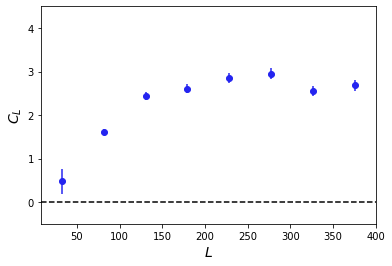

In [12]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-.5,ymax=4.5)
mIk, vIk, sIk, oIk = bn.binned_spec(mb,xobj.fcli['TB'],cn=7)
s = 10*2.726e6*mb.bc*2
errorbar(mb.bc,oIk*s,yerr=vIk*s,fmt='o')
axhline(0,color='k',ls='--')

#### ilens x cib

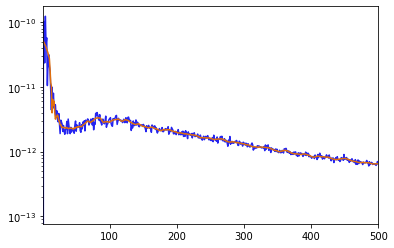

In [13]:
yscale('log')
xlim(1,500)
II = savgol_filter( (np.loadtxt(xobj.fcli['TB'][0])).T[6], 21, 2)
plot(np.loadtxt(xobj.fcli['TB'][0]).T[6])
plot(II)

In [14]:
mcb, vcb, scb, ocb = tools_qrec.binned_spec(mb,aobj,qobj,xobj,5,quad=quad)

In [15]:
quad.append('MV')
print(quad)

['TB', 'EB', 'MV']


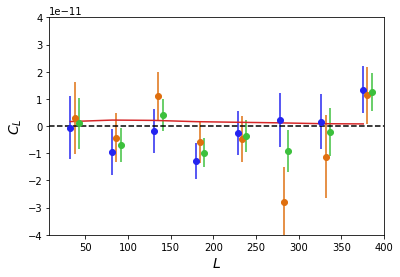

In [16]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-4e-11,ymax=4e-11)
for i, q in enumerate(quad):
    errorbar(mb.bc+i*5,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
plot(mb.bc,oIk*np.pi/180.*.35)
axhline(0,color='k',ls='--')

In [17]:
st_cib = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=oIk*np.pi/180,diag=True,disp=True) for q in quad}
st_cib = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=oIk*np.pi/180,diag=False,disp=True) for q in quad}

obs A -0.89 mean(A) -0.076 sigma(A) 0.72 S/N 1.389 A>oA 0.25
obs A -0.325 mean(A) 0.094 sigma(A) 0.738 S/N 1.355 A>oA 0.5700000000000001
obs A -0.65 mean(A) -0.001 sigma(A) 0.533 S/N 1.875 A>oA 0.20999999999999996
obs A -1.082 mean(A) -0.073 sigma(A) 0.728 S/N 1.374 A>oA 0.16999999999999993
obs A -0.07 mean(A) 0.104 sigma(A) 0.74 S/N 1.351 A>oA 0.81
obs A -0.673 mean(A) -0.005 sigma(A) 0.536 S/N 1.867 A>oA 0.21999999999999997


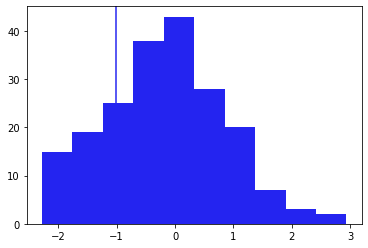

In [18]:
A  = st_cib['TB'].A-st_cib['EB'].A
oA = st_cib['TB'].oA-st_cib['EB'].oA
hist(A)
axvline(oA)

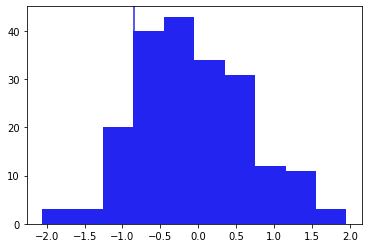

In [19]:
A  = st_cib['MV'].A-st_kap['MV'].A
oA = st_cib['MV'].oA-st_kap['MV'].oA
hist(A)
axvline(oA)

In [20]:
mean, sigma = {}, {}
for q in quad:
    sigma[q] = np.sqrt(1./(1./st_cib[q].sA**2+1./st_kap[q].sA**2))
    mean[q] = (st_cib[q].oA/st_cib[q].sA**2+st_kap[q].oA/st_kap[q].sA**2)*sigma[q]**2
    print(mean[q],sigma[q])

-0.6077545742351821 0.5288433598914495
0.11662678786153546 0.5184445662769392
-0.2596907374658465 0.3844530415931468


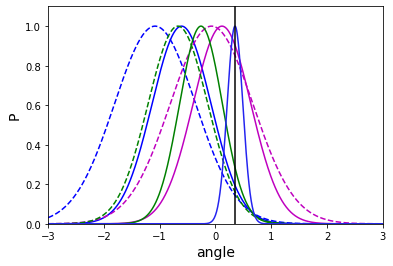

In [21]:
pl.plot_1dstyle(xmin=-3,xmax=3,ymin=0.0,ymax=1.1,xlab='angle',ylab='P')
x  = np.arange(-3.,3.,.01)
for q, c in zip(quad,['b','m','g','r']):
    plot(x,np.exp(-.5*(x-mean[q])**2/sigma[q]**2),color=c)
    plot(x,np.exp(-.5*(x-st_cib[q].oA)**2/st_cib[q].sA**2),color=c,ls='--')
#hist(st_cib['c'].A,bins=12,weights=np.ones_like(st_cib['c'].A)/float(len(st_cib['c'].A)))
#axvline(mean+sigma)
#axvline(mean-sigma)
plot(x,np.exp(-.5*(x-.35)**2/.14**2))
axvline(.35,color='k')

In [22]:
oAc = (mean['MV']/sigma['MV']**2+.35/.14**2)/(1./sigma['MV']**2+1./.14**2)
vAc = 1./(1./sigma['MV']**2+1./.14**2)**0.5
print(oAc,vAc,oAc/vAc)

0.27861623153783366 0.13154920815055762 2.1179620573539166
